#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/mask_detection'

/content/drive/MyDrive/Colab Notebooks/mask_detection


In [3]:
!pip install torchvision --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision import transforms, datasets
from torchvision.transforms.functional import to_pil_image

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

from google.colab.patches import cv2_imshow

import os
import cv2
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
transforms = torchvision.transforms.Compose([#transforms.CenterCrop([112,112]),
                                             #transforms.RandomRotation(90),
                                             transforms.Resize([112,112]),
                                             transforms.ToTensor(),
])

In [12]:
# 1. prepare data
image_path = "./example"

# ImageFolder and data_loader code below
img_data = ImageFolder(root=image_path, transform=transforms)
img_loader = torch.utils.data.DataLoader(img_data, batch_size = 1, shuffle = False, num_workers=2)

In [13]:
def custom_imshow(img):
  img = img.detach().cpu().numpy()
  plt.imshow(np.transpose(img, (1,2,0)))
  plt.show()

In [14]:
# 2. load model
PATH = "./MaskTheFace/Result/20230408-052320/baseline.pt"


# model load below and assign device
my_model = models.resnet50(pretrained=False)
num_ftrs = my_model.fc.in_features
my_model.fc = nn.Linear(num_ftrs, 1)

my_model.to(device)
my_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
# 3. perform evaluation
def evaluation(model, img_loader):
    model.eval()   
    
    with torch.no_grad(): 
        for batch_idx, (inputs, targets) in enumerate(img_loader):
            inputs, targets = inputs.to(device), targets.to(device) 
            custom_imshow(inputs[0])

            output = model(inputs)
            pred = torch.round(torch.sigmoid(output)) # round fn 통해서 0 or 1로 바뀜
            print(pred)
            if (pred==1):
                cls = 'Wearing Mask'
            else:
                cls = 'Not Wearing Mask'
            print("Prediction : ", cls)

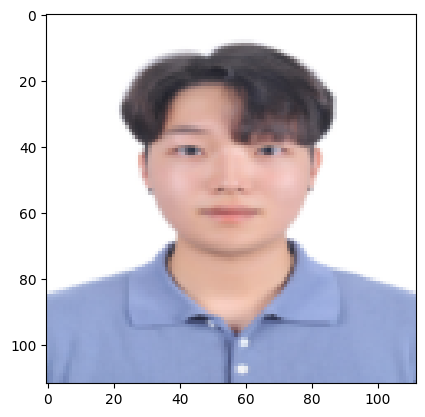

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


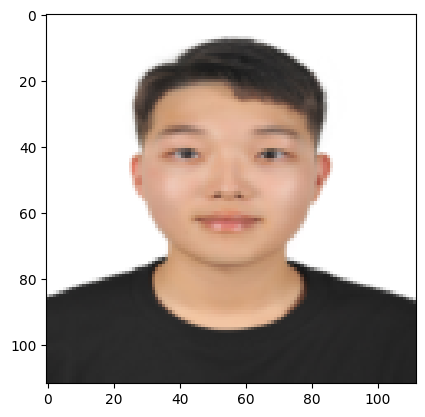

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


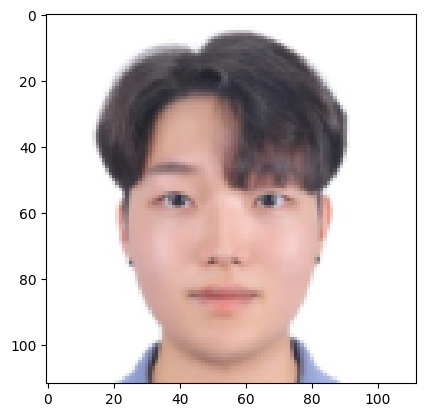

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


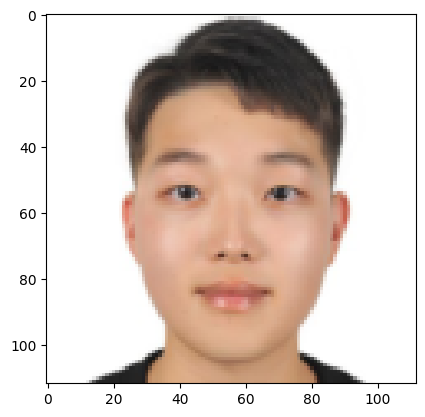

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


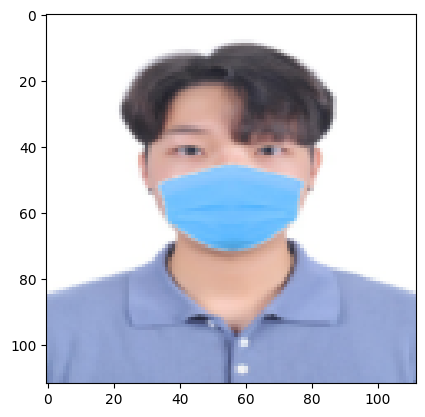

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


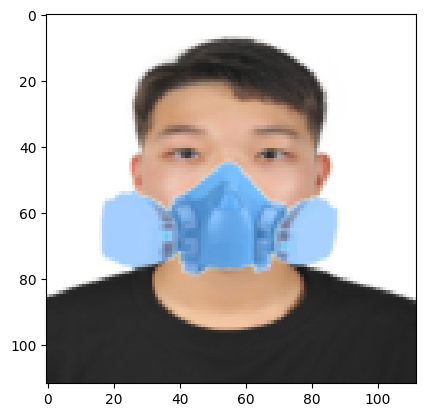

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


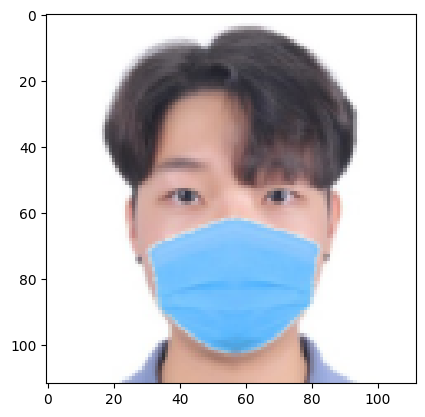

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


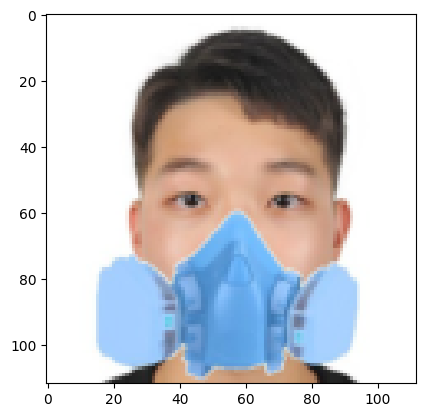

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


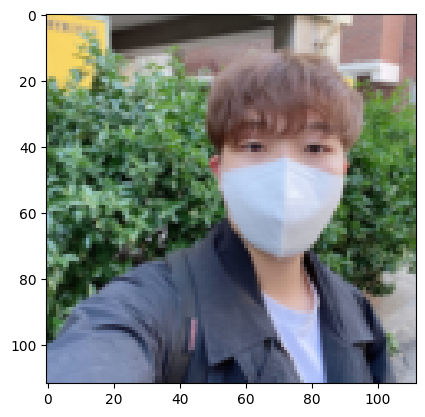

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


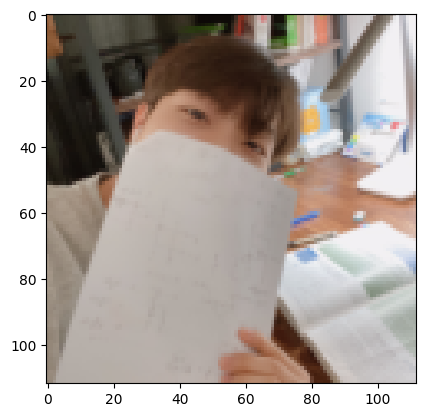

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


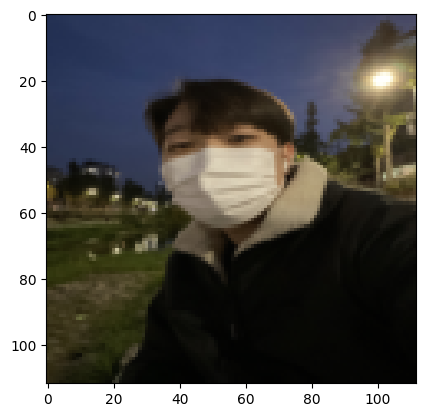

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


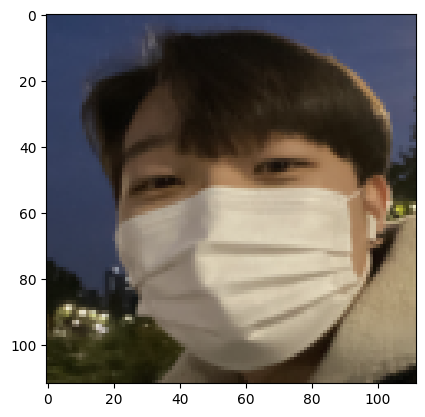

tensor([[0.]], device='cuda:0')
Prediction :  Not Wearing Mask


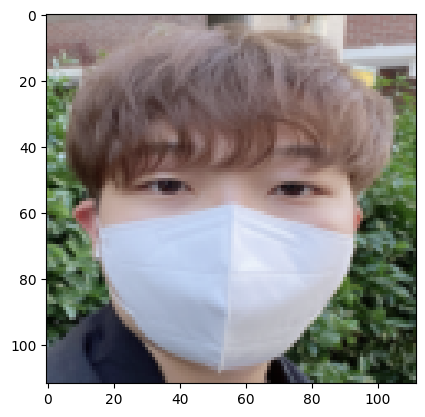

tensor([[1.]], device='cuda:0')
Prediction :  Wearing Mask


In [16]:
evaluation(my_model, img_loader)